# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 8.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the data from the csv file
data = pd.read_csv('/content/drive/MyDrive/FoodHub/foodhub_order.csv')

# Copy the data for further processing to avoid any changes to the original data
df = data.copy()

In [5]:
# Code to look at the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# check the shape of the data set
print("There are", data.shape[0], "rows and", data.shape[1], "columns in the data.")

There are 1898 rows and 9 columns in the data.


- *There are 1898 rows and 9 columns in the data*


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Check the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


- *There are 5 numerical columns and 4 object type columns in the data*
- *The `rating` column is being read as a 'object' data type but it should be in numerical format*
- *The `restaurant_name`, `cuisine_type` and `day_of_the_week` columns are of object type while the rest of the columns are numerical in nature*
- *Numerical Columns : The `order_id`, `customer_id`, `food_preparation_time` and `delivery_time` columns are int while `cost_of_the_order` is a float*


### **Fixing the data types**

In [8]:
# Analyze the data in rating column

df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

- *For orders with no rating, data is updated as 'Not given'*. Let's replace such data points with null values.


In [9]:
# Replace string 'Not give' values with nan
df['rating'] = df['rating'].replace(['Not given'],np.NAN)

# Change the data type to numeric
df['rating'] = df['rating'].astype(float)

In [10]:
# Review the data types for the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


- *The data type for `rating` column is now fixed to be in numerical format.*
- *There are 6 numerical columns and 3 object type columns in the data.*
- *The `rating` column now has less values compared to other columns.*

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
# Check for missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


- *The `rating` column has missing values.*
- *It is possible that rating was not provided for all the orders. Let's treat the missing rating values with the mean rating value of the respective restaurant*

In [12]:
# Replace null values with the mean rating value of the restaurant
df['rating'] = df['rating'].fillna(df.groupby('restaurant_name')['rating'].transform('mean'))

In [13]:
# Check for missing values in the data, after treating the missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,30
food_preparation_time,0
delivery_time,0


- *Majority of the missing values are treated for rating, but still there are 30 missing values.*
- *These are for the restaurants where none of the orders are rated. Let's treat the missing values for these with the mean rating value of the respective cuisine type.*

In [14]:
# Replace null values with the mean rating value of the cuisine type
df['rating'] = df['rating'].fillna(df.groupby('cuisine_type')['rating'].transform('mean'))

In [15]:
# Check for missing values in the data, after treating the missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


- *All the missing values for rating are now treated*



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [16]:
# Check the statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.349797,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.606255,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.328125,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


- *The minimum time to prepare the food once an order is placed is 20 minutes*
- *The average time to prepare the food once an order is placed is 27.37 minutes*
- *The maximum time to prepare the food once an order is placed is 35 minutes*

### **Question 5:** How many orders are not rated? [1 mark]

In [17]:
# Find the number of orders where rating is empty/not provided

#As the copied data frame (df) is treated for missing values in rating, original data frame (data) is used to find the number of orders where rating is empty/not provided
data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


- *736 orders are not rated.*

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####Order Id

In [18]:
# Check unique order id
df['order_id'].nunique()

1898

- *All the values are unique for order id.*

####Customer Id

There are  1200 unique customers.
customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64


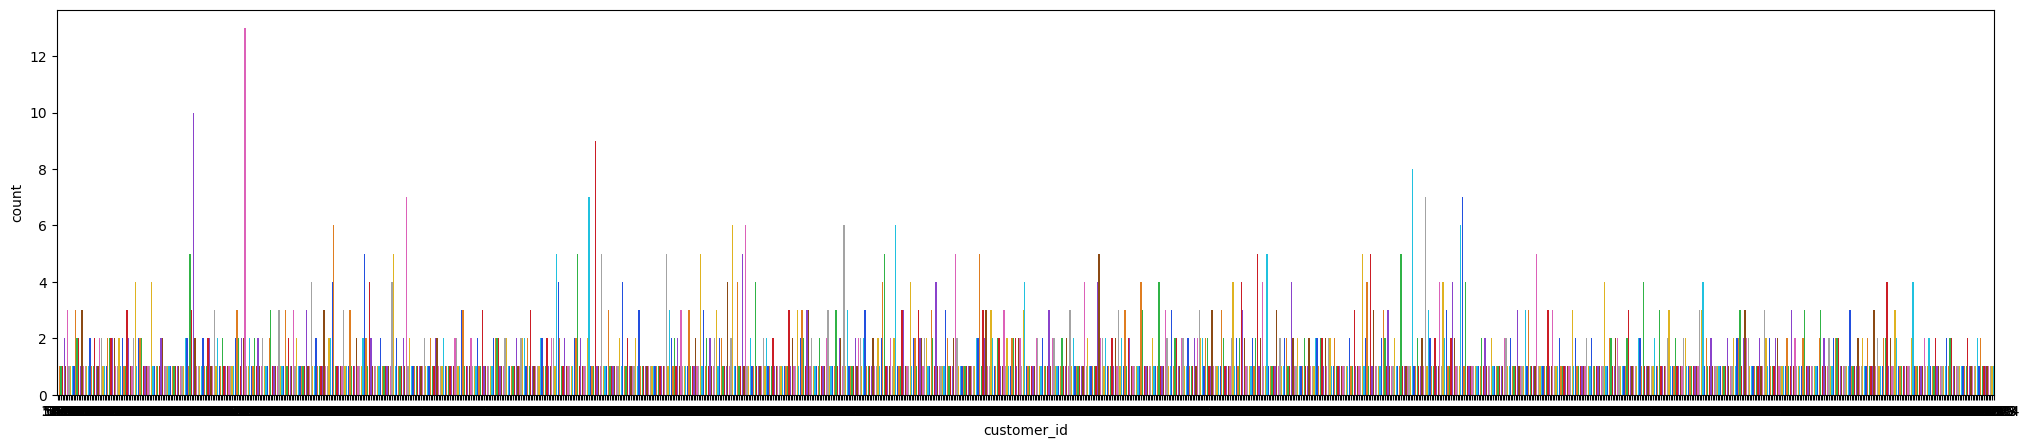

In [19]:
# Check unique customer id
print("There are ",df['customer_id'].nunique(),"unique customers.")

# Check # of orders by customer
print(df['customer_id'].value_counts())

# Count plot for the customers
plt.figure(figsize=(25,5))
sns.countplot(data=df, x='customer_id',palette='bright',hue='customer_id',legend=False )
plt.show();

- *There are 1200 unique customers.*
- *Maximum number of orders placed by a customer is 13.*
- *Most of the customers have ordered only once.*


####Restaurants

There are 178 unique restaurants.
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
There are 50 restaurants with only one order.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


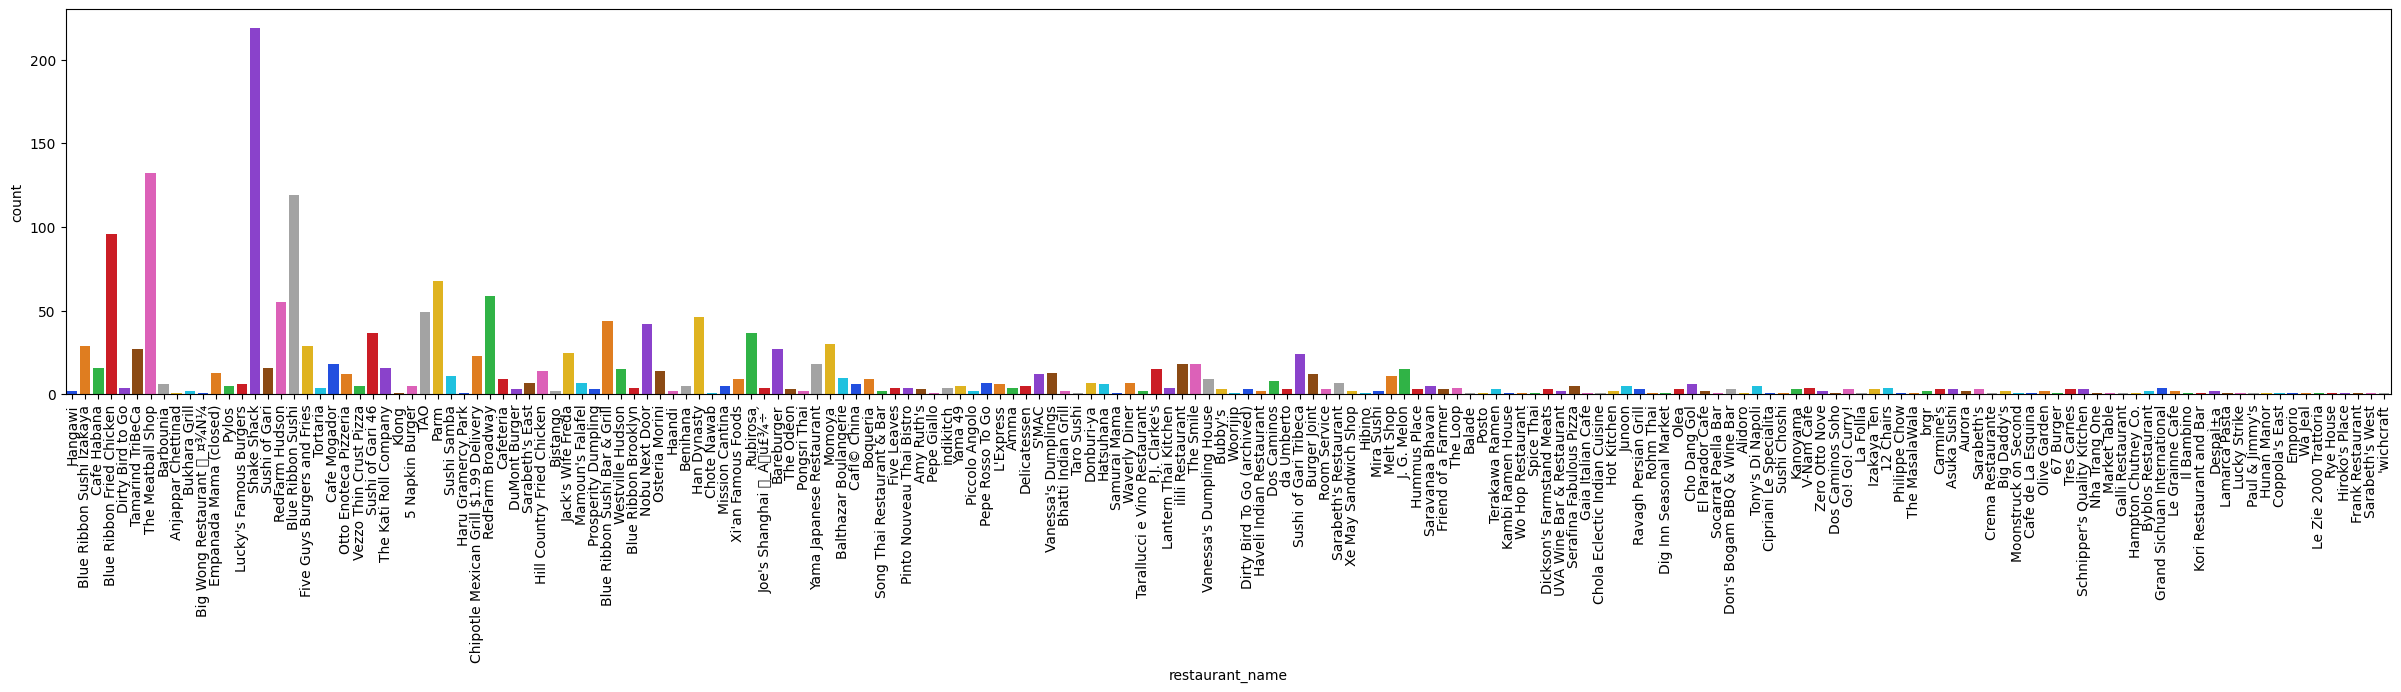

In [20]:
# Check unique restaurant count
print("There are",df['restaurant_name'].nunique(),"unique restaurants.")

# Check # of orders by restaurant
print(df['restaurant_name'].value_counts())

# Check # of restaurants with only one order
print("There are",df['restaurant_name'].value_counts()[df['restaurant_name'].value_counts() == 1].shape[0],"restaurants with only one order.")

# Count plot for the restaurants
plt.figure(figsize=(30,5));
sns.countplot(data=df, x='restaurant_name',palette='bright',hue='restaurant_name',legend=False )  ;
plt.xticks(rotation=90);
plt.show();

- *There are 178 unique restaurants. And 50 restaurants have only one order.*
- *Maximum number of orders placed in a restaurant is 219.*
- *Shake Shack has most number of orders followed by The Meatball Shop and Blue Ribbon Sushi*

####Cuisine

There are 14 unique cuisine types.
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


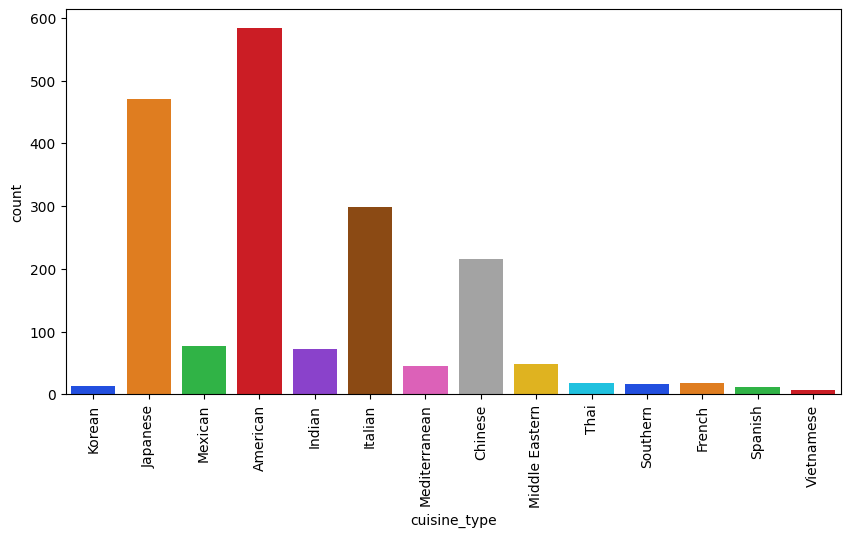

In [21]:
# Check the count for unique cuisine type
print("There are",df['cuisine_type'] .nunique(),"unique cuisine types.")

# Check # of orders by cuisine type
print(df['cuisine_type'].value_counts())

# Count plot for the cuisine type
plt.figure(figsize=(10,5));
sns.countplot(data=df, x='cuisine_type',palette='bright',hue='cuisine_type',legend=False )  ;
plt.xticks(rotation=90);
plt.show();

- *There are 14 unique cuisines.*
- *Maximum number of orders placed for a cusine type is 584.*
- *American cuisine has most number of orders followed by Japanese and Italian cuisines.*

####Cost of the order

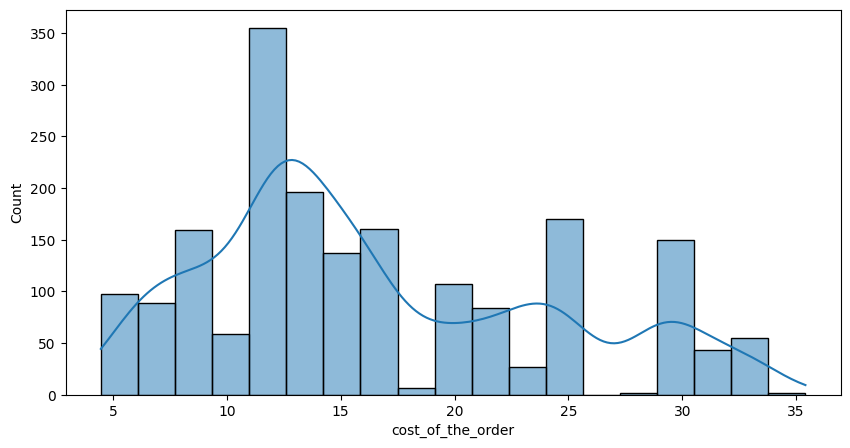

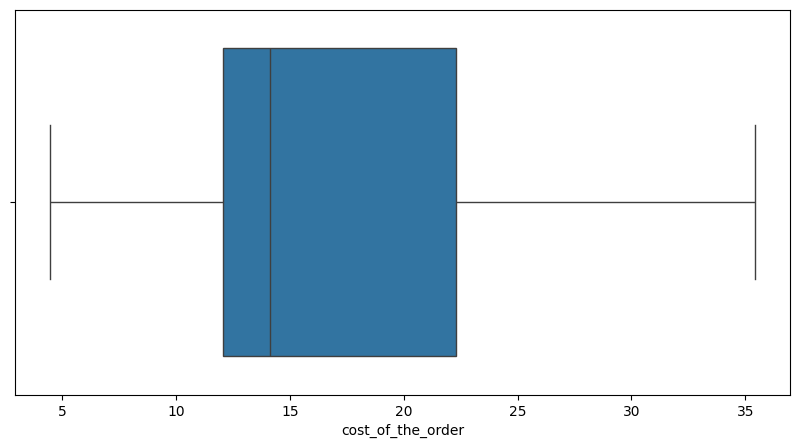

In [22]:
# Histogram for the cuisine type
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.show();

# Box plot for the cuisine type
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='cost_of_the_order' )
plt.show();


- *Cost of the order ranges betwwen 5 and 35*
- *Cost for 50% of the orders range between 12 and 23*
- *50% of the order cost less than 14*
- *The distribution is skewed towards right.*

####Day of the week

In [23]:
# Check no. of orders by day of the week
df['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


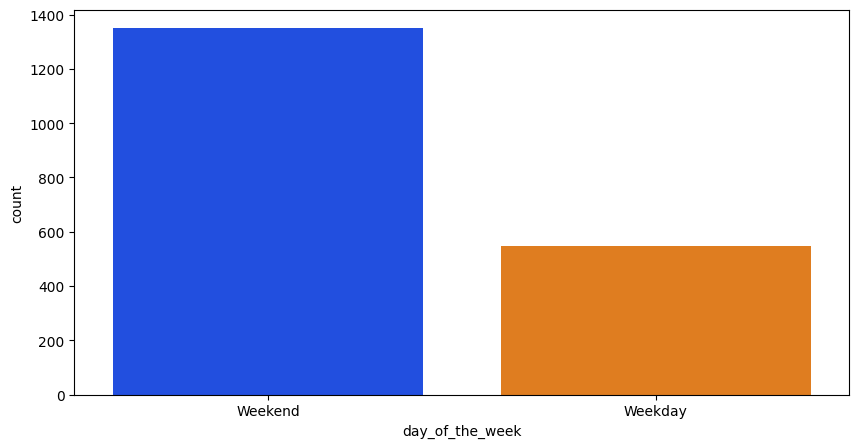

In [97]:
# Count plot for day of the week
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_of_the_week',palette='bright',hue='day_of_the_week')
plt.show();


- *Day of the week is categorized as either weekday or weekend*
- *Number of orders on weekends are more than the weekdays*

####Rating

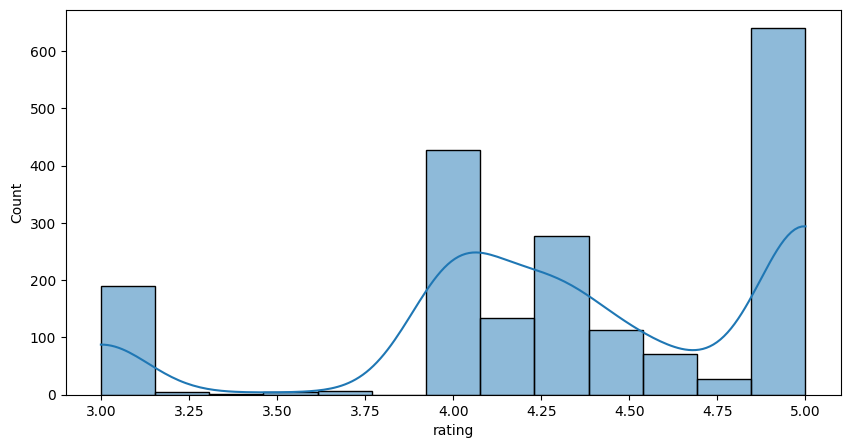

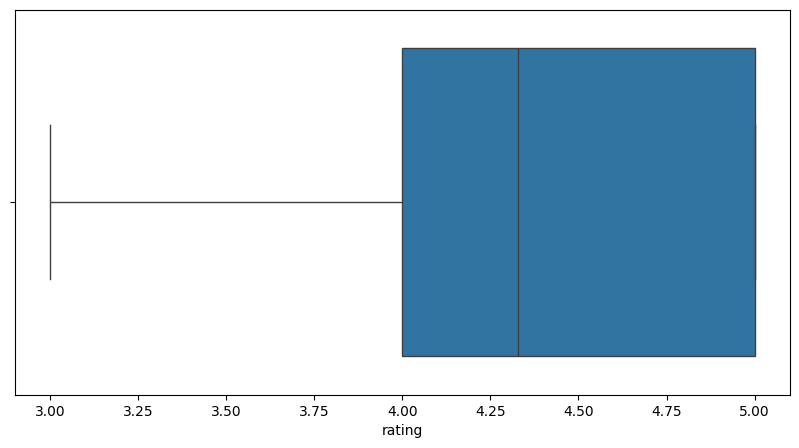

In [24]:
# Histogram for rating
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='rating',kde=True)
plt.show();

# Box plot for rating
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='rating' )
plt.show();

- *Rating for the orders are between 3 and 5, with most of the rating in the higher end.*
- *Rating for 75% of the orders are greater than or equal to 4.*
- *The distribution is left skewed.*

####Food Preparation Time

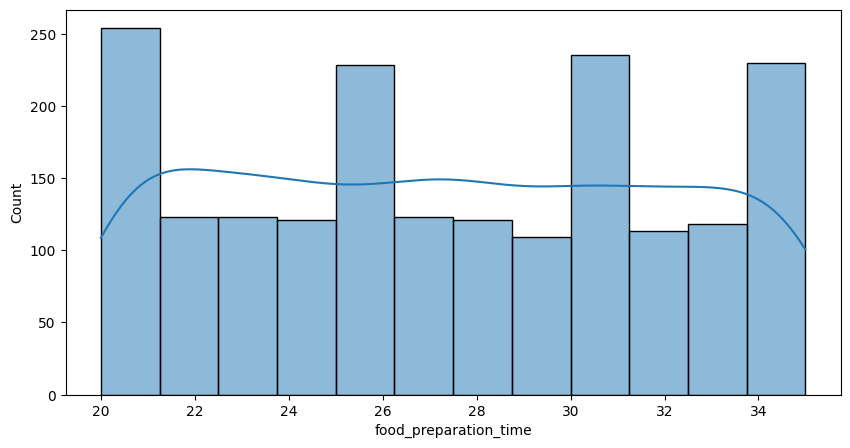

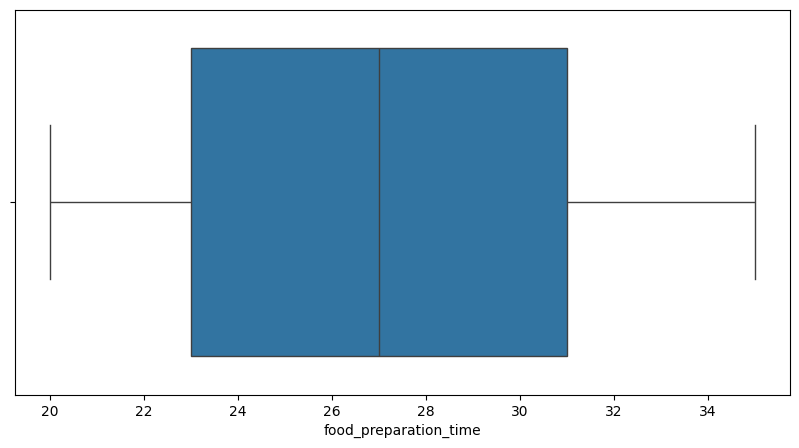

In [25]:
# Histogram for food preparation time
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='food_preparation_time',kde=True)
plt.show();

# Box plot for food preparation time
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='food_preparation_time' )
plt.show();

- *The food preparation time for the orders are between 20 and 35 minutes.*
- *The distribution is normal for food preparation time.*

####Delivery Time

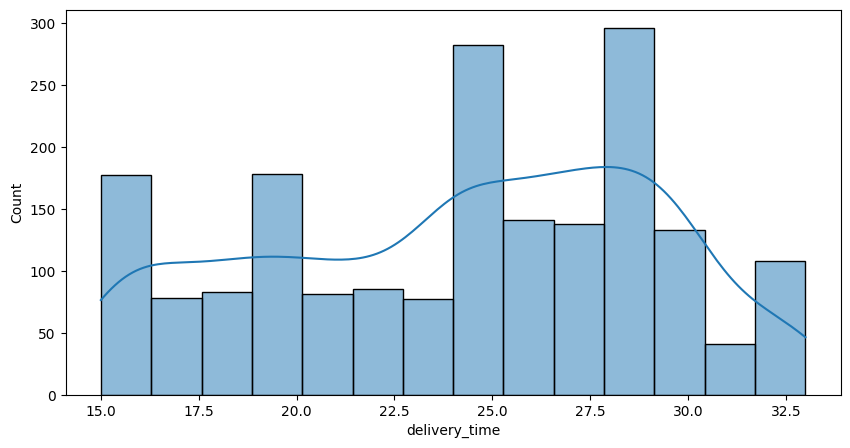

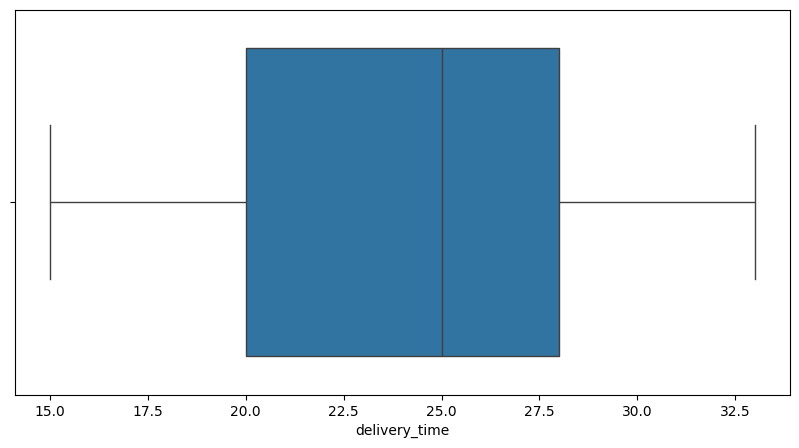

In [26]:
# Histogram for delivery time
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='delivery_time',kde=True)
plt.show();

# Box plot for delivery time
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='delivery_time' )
plt.show();

- *The delivery time for the orders are between 15 and 32.5 minutes.*
- *The distribution is close to normal for delivery time.*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [27]:
# Find the order count by restaurant and display the top 5 restaurants
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


- *The top 5 restaurants in terms of the number of orders received are*
 1.   *Shake Shack*
 2.   *The Meatball Shop*
 3.   *Blue Ribbon Sushi*
 4.   *Blue Ribbon Fried Chicken*
 5.   *Parm*










### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [28]:
# Slice the data for week end orders and find the cuisine type with most number of orders
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)


,count
cuisine_type,
American,415


- *The most popular cuisine on weekends is American.*

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [29]:
# Find the total number of orders
totalorders = df['cost_of_the_order'].shape[0]

# Find the total number of orders greater than $20
orders_gt_20 = df[df['cost_of_the_order']>20].shape[0]

# Find the percentage of orders that are greater than $20
percent_orders_gt_20 = orders_gt_20/totalorders*100

# Print the result
print("The percentage of the orders that cost more than 20 dollars is", round(percent_orders_gt_20,2))

The percentage of the orders that cost more than 20 dollars is 29.24


- *The percentage of the orders that cost more than 20 dollars is 29.24 %*


### **Question 10**: What is the mean order delivery time? [1 mark]

In [30]:
# Find mean for delivery time and print the result
print("The mean order delivery time is",round(df['delivery_time'].mean(),2), "minutes")

The mean order delivery time is 24.16 minutes


- *The mean order delivery time is 24.16 minutes*


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [31]:
# Find the top 3 customers based on the order count
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


- *The IDs of top 3 most frequent customers are 52832, 47440 and 83287 and the number of orders they placed are 13, 10 and 9 respectively.*


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Numerical columns (excluding order id and customer id)

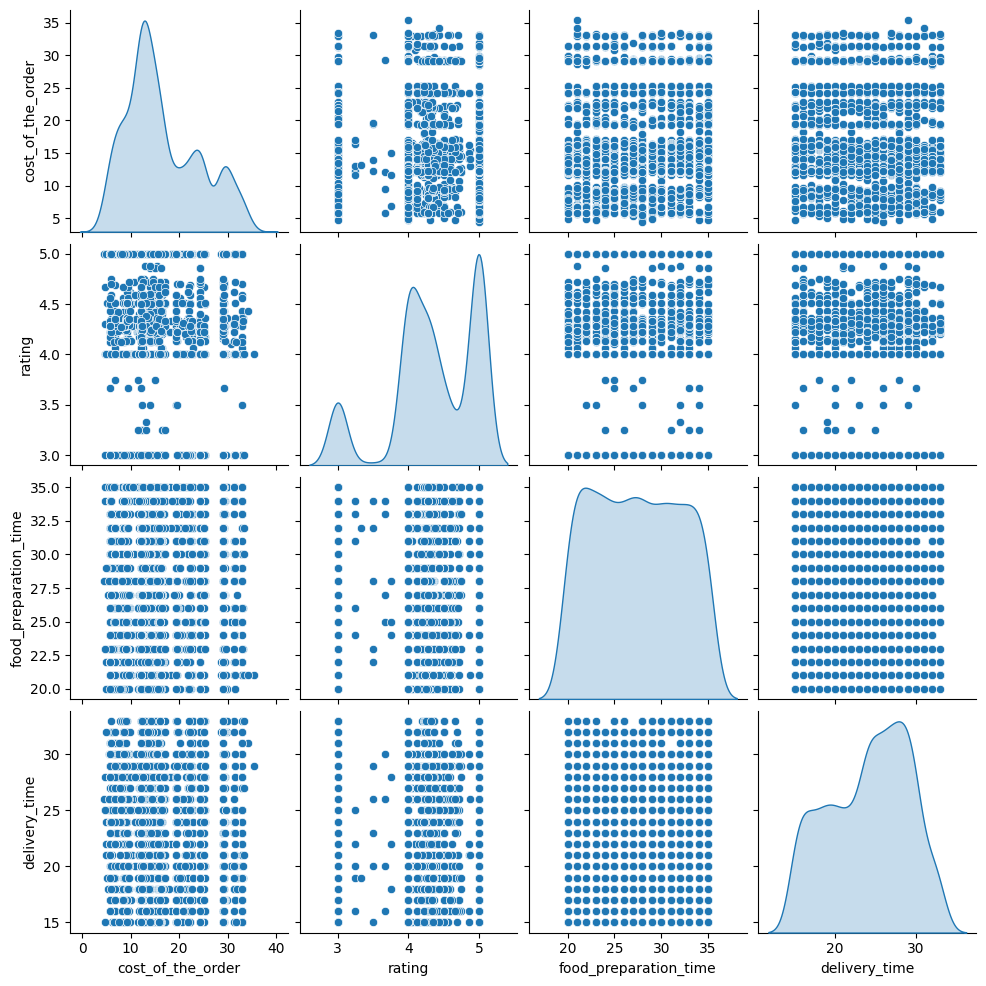

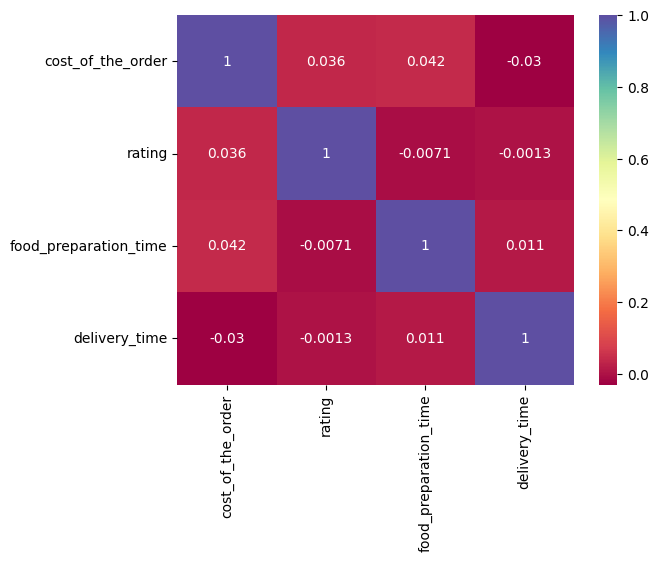

In [32]:
numerical_columns = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

# Pair plot for numerical columns in the data set, excluding two id columns
sns.pairplot(df[numerical_columns], diag_kind="kde");
plt.show();

# Heat map for numerical columns in the data set, excluding two id columns
sns.heatmap(df[numerical_columns].corr(),annot=True,cmap='Spectral')
plt.show();

- *The coorelation between the numerical columns are close to 0, indicating weak relationship between them.*
- *None of the numerical columns have much influence on each other*.


#### Cuisine and Food Preparation Time

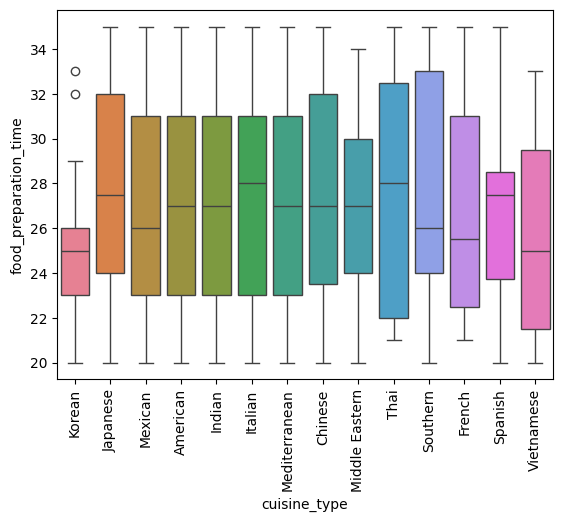

In [33]:
# Boxplot between cuisine type and food preparation time
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time',hue='cuisine_type')
plt.xticks(rotation=90)
plt.show();

- *Korean cuisine has the lowest and consistent food preparation time. There are a couple of outliers with long preparation time, which are still below the maximum preparation time for other cuisines.*
- *75% of Korean cuisine orders are prepared less than the median preparation time of other cuisines.*
- *The distribution is right skewed for Thai, French, Spanish and Vietnamese cuisine.*
- *The distribution is left skewed for Southern cuisine.*
- *And for the rest of the cuisines, the distribution is normal.*


#### Cuisine and Delivery Time

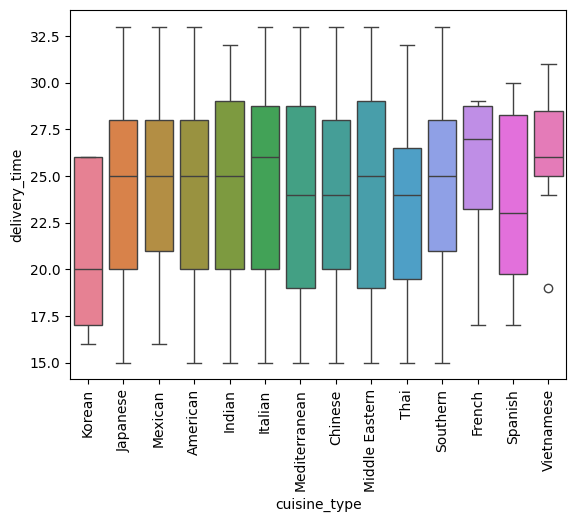

In [34]:
# Boxplot between cuisine type and delivery time
sns.boxplot(data=df, x='cuisine_type', y='delivery_time',hue='cuisine_type')
plt.xticks(rotation=90)
plt.show();

- *All Korean cuisine orders are delivered before 75% of the orders are delivered for other cuisines.*
- *The distribution is left skewed for Korean, Indian, French cuisines.*
-*The distribution for Vietnamese cuisine is right skewed. And there is 1 outlier with less delivery time.*
- *The distribution is normal for the rest of the cuisines.*

#### Cuisine and Cost of the order

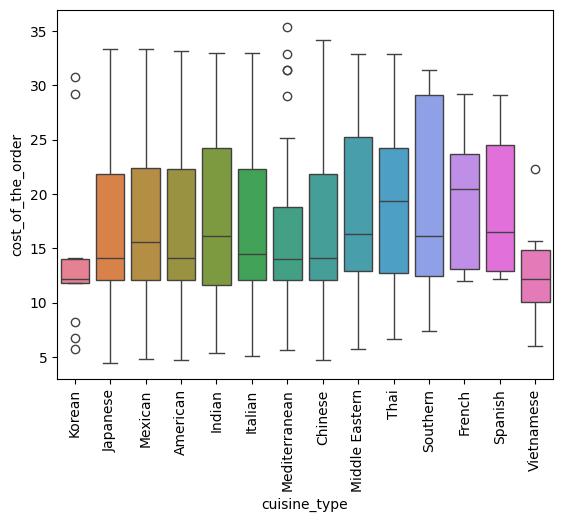

In [35]:
# Boxplot between cuisine type and cost of the order
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order',hue='cuisine_type')
plt.xticks(rotation=90)
plt.show();

- *Cost of the orders for Korean cuisine are cheaper on an average compared to other cuisines.*
- *There are outliers for Korean cuisine with both lower and higher order cost.*
- *There are outliers for Mediterranean and Vietnamese cuisine with higher order cost.*
- *The distribution is right skewed for Japanese, Mexican, American, Italian, Chinese, French and Spanish cuisine.*
- *The distribution is left skewed for Southern and Vietnamese cuisines.*

#### Cuisine and Rating

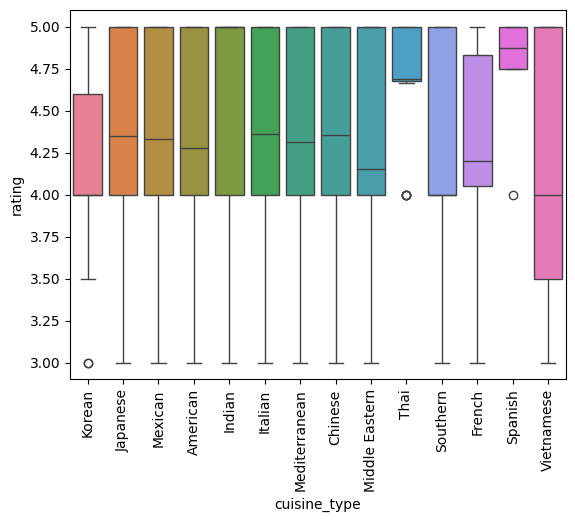

In [36]:
sns.boxplot(data=df, x='cuisine_type', y='rating',hue='cuisine_type')
plt.xticks(rotation=90)
plt.show();

- *Thai and Spanish cuisine has the best rating overall. Both of them have one outlier with a lower rating of 4.*
- *Korean cuisine has one outlier with a lower rating of 3.*
- *The distribution for all the cuisines are left skewed except for Korean, Thai and Spanish cuisines.*

#### Cuisine and Day of the Week

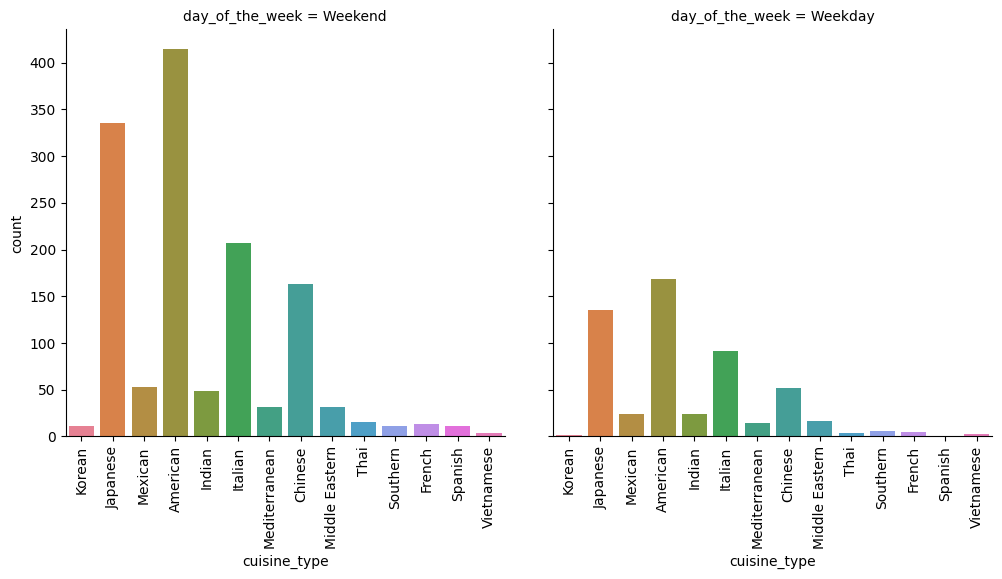

In [37]:
# Count plot for cuisine type by day of the week
#plt.figure(figsize=(20,5))
g = sns.catplot(data=df,x='cuisine_type',col='day_of_the_week',kind='count', hue='cuisine_type',col_wrap=3)
g.set_xticklabels(rotation=90)
plt.show();

- *The distribution of orders between the cuisines are almost same on both week days and week ends.*
- *The orders are more for all cuisines on week ends.*

#### Day of the week and Food Preparation Time

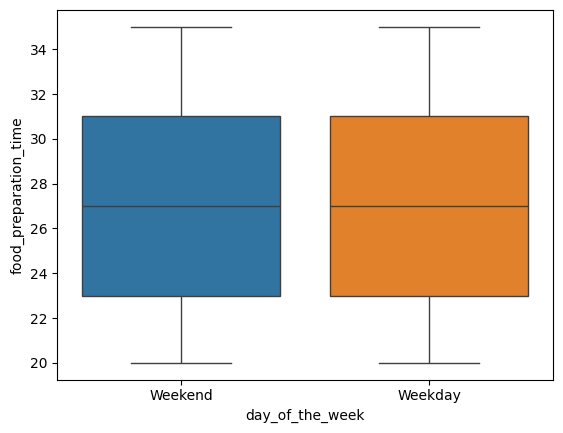

In [38]:
# Boxplot between Day of the week and food preparation time
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time',hue='day_of_the_week')
#plt.xticks(rotation=90)
plt.show();

- *Food preparation time distribution is same both on week days and week ends*

#### Day of the week and Delivery Time

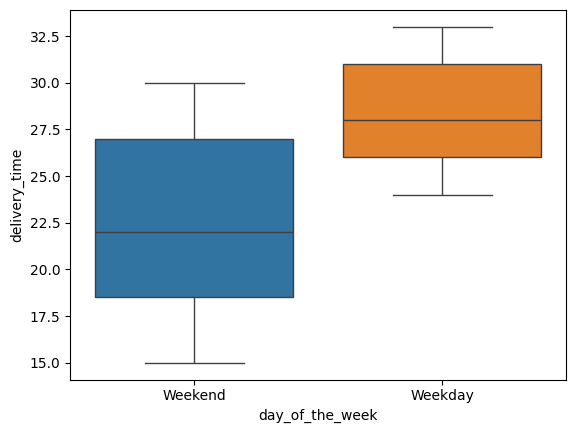

In [39]:
# Boxplot between Day of the week and delivery time
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time',hue='day_of_the_week')
plt.show();

- *Delivery times are slower on weekdays compared to weekends.*
- *More than 50% of the week end orders are delivered faster than any delivery on week days. It's delivered in less than 22.5 minutes. The minimum delivery time on week days is more than 22.5 minutes.*

#### Day of the week and Cost of the order

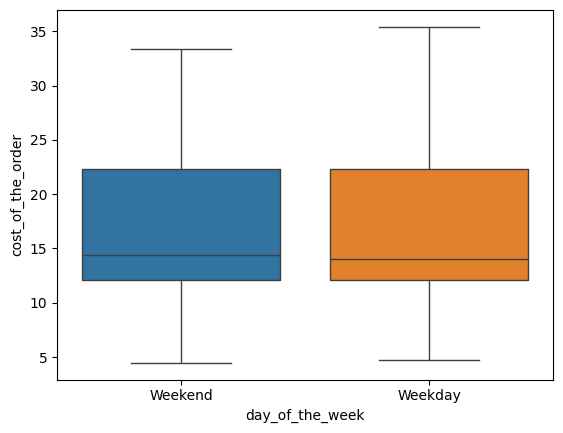

In [40]:
# Boxplot between Day of the week and cost of the order
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order',hue='day_of_the_week')
plt.show();

- *Cost of the order distribution is similar on both week days and week ends.*

#### Day of the week and Rating

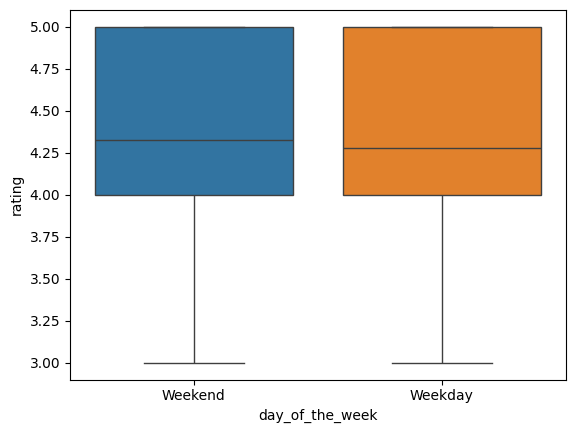

In [41]:
# Boxplot between Day of the week and rating
sns.boxplot(data=df, x='day_of_the_week', y='rating',hue='day_of_the_week')
plt.show();

- *Rating distribution is similar on both week days and week ends, with the median rating on week days slightly lower than the median rating on week ends.*

#### Top Restaurants with more than 50 orders

In [42]:
top_restaurants = df['restaurant_name'].value_counts()[df['restaurant_name'].value_counts() > 50].index
top_restaurants_df = df[df['restaurant_name'].isin(top_restaurants)]

print("There are",top_restaurants_df['restaurant_name'].nunique(),"restaurants with more than 50 orders.")

#top_restaurants_df.groupby('cuisine_type')['restaurant_name'].value_counts()
top_restaurants_df.groupby('cuisine_type')['restaurant_name'].value_counts()

There are 7 restaurants with more than 50 orders.


cuisine_type  restaurant_name          
American      Shake Shack                  219
              Blue Ribbon Fried Chicken     96
              The Meatball Shop             20
Chinese       RedFarm Broadway              59
              RedFarm Hudson                55
Italian       The Meatball Shop            112
              Parm                          68
Japanese      Blue Ribbon Sushi            119
Name: count, dtype: int64

- *There are 7 restaurants with more than 50 orders.*
- *2 are American, 2 are Chinese, 1 is Italian, 1 is Japanese and 1 serve both American and Italian.*

#### Top Restaurants and Food Preparation Time

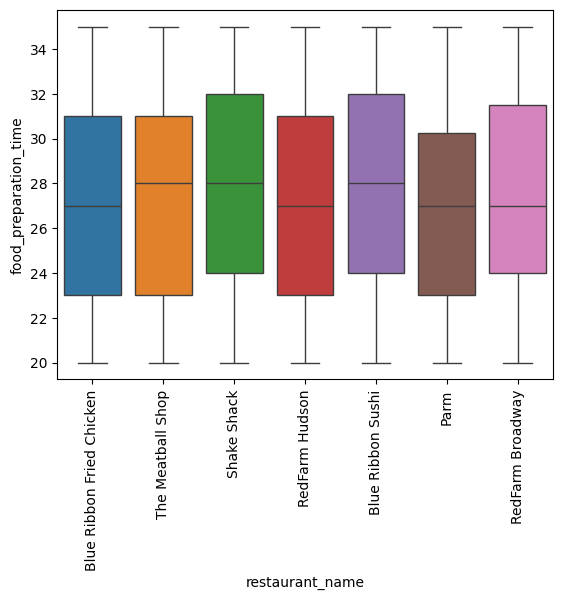

In [43]:
# Boxplot between top restaurants and food preparation time
sns.boxplot(data=top_restaurants_df, x='restaurant_name', y='food_preparation_time',hue='restaurant_name')
plt.xticks(rotation=90)
plt.show();

- *Shake Shack and Blue Ribbon Sushi are the top 2 restaurants with more number of orders, and the distribution is left skewed for them.*
- *The distribution is right skewed for Parm.*
- *The distribution is almost normal for the remaining top restaurants.*


#### Top Restaurants and Delivery Time

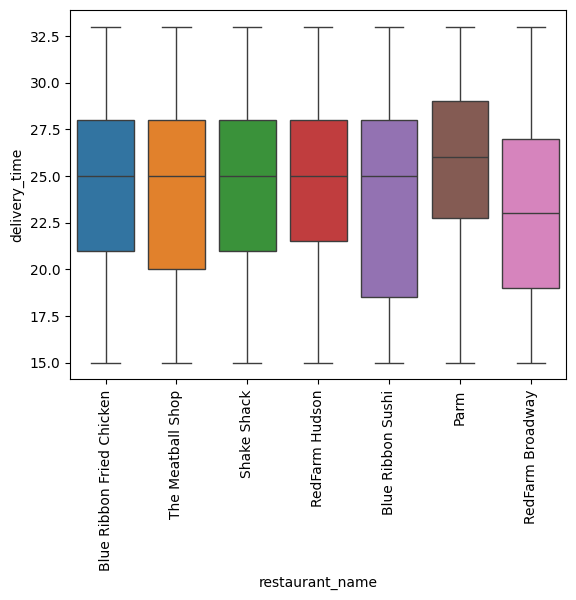

In [44]:
# Boxplot between top restaurants and delivery time
sns.boxplot(data=top_restaurants_df, x='restaurant_name', y='delivery_time',hue='restaurant_name')
plt.xticks(rotation=90)
plt.show();

- *Median Delivery time (22.5 minutes) for RedFam Broadway is better than other restaurants (25 minutes).*
- *The distribution is left skewed for RedFarm Hudson and Parm restaurants.*
-*Almost 75% of the orders for Parm are delivered beyond median delivery time of RedFam Broadway.*
- *Other than Parm, the median delivery time of other top restaurants are less than or equal to the overall median delivery time (25 minutes).*

#### Top Restaurants and Cost of the order

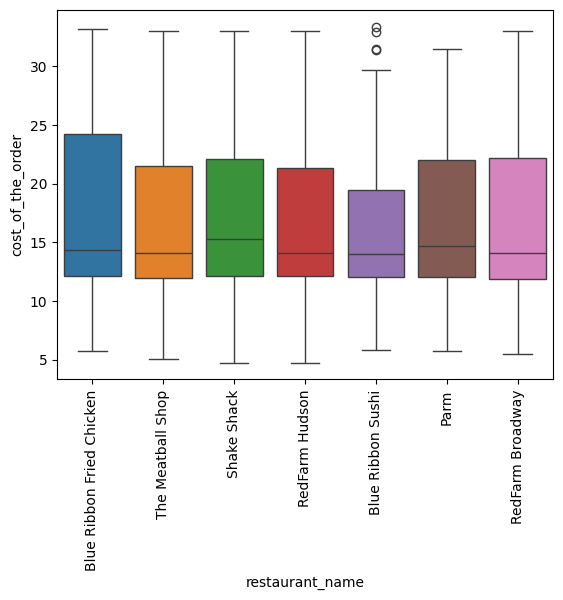

In [45]:
# Boxplot between top restaurants and cost of the order
sns.boxplot(data=top_restaurants_df, x='restaurant_name', y='cost_of_the_order',hue='restaurant_name')
plt.xticks(rotation=90)
plt.show();

- *The distribution is right skewed for all the top restaurants.*
- *There are outliers for Blue Ribbon Sushi with higher order cost.*
- *The median cost of the order for all top restaurants are less than or equal to $15.*

#### Top Restaurants and Rating

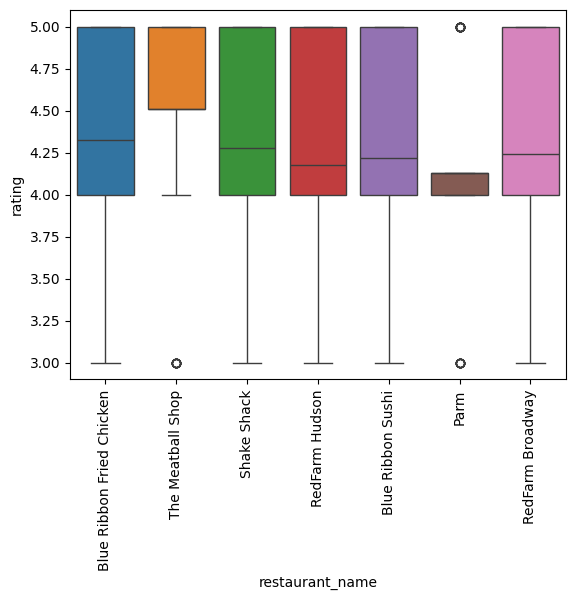

In [46]:
# Boxplot between top restaurants and rating
sns.boxplot(data=top_restaurants_df, x='restaurant_name', y='rating',hue='restaurant_name')
plt.xticks(rotation=90)
plt.show();

- *The Meatball Shop has the best rating overall. It has one outlier with a lower rating of 3.*
- *Parm has the lowest overall rating compared to other top restaurants. It has one outlier in both the ends.*
- *The distribution for all the top restaurants, except for Parm are left skewed.*

Food Preparation Time and Delivery Time by Cuisines

#### Top Restaurants and Day of the Week

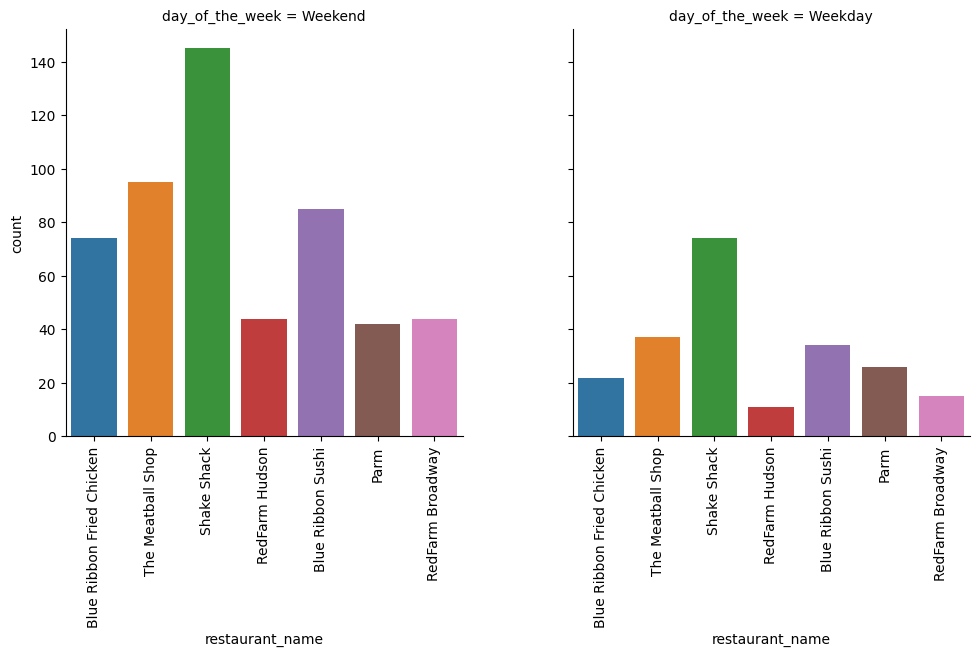

In [47]:
# Count plot for top restaurants and day of the week
g = sns.catplot(data=top_restaurants_df,x='restaurant_name',col='day_of_the_week',kind='count', hue='restaurant_name',col_wrap=3)
g.set_xticklabels(rotation=90)
plt.show();

- *The distribution of orders between the top restaurants are almost same on both week days and week ends.*
- *The orders are more for all top restaurants on week ends.*

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [48]:
# define a function to take the restaurant name, rating count criteria and rating mean criteria
# For the given restaurant in the data set,
#     if the rating count is greater than the promotional offer criteria and
#     if the rating mean  is gretaer than the promotional offer criteria
#           print the restaurant name else do nothing
def eligible_for_promotion(restaurant_name, rating_count_criteria, rating_mean_criteria):
  rating_count = df[df['restaurant_name'] == restaurant_name].shape[0]
  rating_mean = df[df['restaurant_name'] == restaurant_name]['rating'].mean()

  if(rating_count > rating_count_criteria and rating_mean > rating_mean_criteria):
    print(restaurant_name)
    return True
  else:
    return False


In [49]:
# define rating count eligibility for promotion
rating_count_criteria =  50

# define average rating criteria for promotion
rating_mean_criteria = 4

print("The restaurants eligible for promotions are ")
for x in df['restaurant_name'].unique():
  eligible_for_promotion(x,rating_count_criteria, rating_mean_criteria)

The restaurants eligible for promotions are 
Blue Ribbon Fried Chicken
The Meatball Shop
Shake Shack
RedFarm Hudson
Blue Ribbon Sushi
Parm
RedFarm Broadway


- *The restaurants fulfilling the criteria to get the promotional offer are*
  1.   *Blue Ribbon Fried Chicken*
  2.   *The Meatball Shop*
  3.   *Shake Shack*
  4.   *RedFarm Hudson*
  5.   *Blue Ribbon Sushi*
  6.   *Parm*
  7.   *RedFarm Broadway*

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [50]:
# Define a function to calcualte the percentage based on the order cost.
# Return 25% if the oder cost is greater than $20
# Return 15% if the order cost is greater than $5 and less than or equal to $20
# Retunr 0% if the order is less than or equal to $5

def calcpercentage(cost_of_the_order):
  if(cost_of_the_order > 20):
    return 0.25
  elif(cost_of_the_order > 5):
    return 0.15
  else:
    return 0

In [51]:
# Calculate the company charge % for each of the order and update it in a new column 'company_charge_percent'
df['company_charge_percent'] = [calcpercentage(x) for x in df['cost_of_the_order']]

In [52]:
# Calculate the company revenue for each of the orders by multiplying cost_of_the_order and company_charge_percent, and update it in a new column 'company_revenue'. Round the amount to two floating points.
df['company_revenue'] = round(df['cost_of_the_order'] * df['company_charge_percent'],2)

# Find the sum of company_revenue across all orders for the net revenue generated by the company

print("The net revenue generated by the company across all the orders is", round(df['company_revenue'].sum(),2))

The net revenue generated by the company across all the orders is 6166.4


- *The net revenue generated by the company across all the orders is $6166.40*

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [53]:
# Calculate the total time required to deliver food by adding food_preparation_time and delivering time. Store the calcualted time in a new column 'total_time'
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find the number of orders with total time greater than 60 minutes
orders_total_time_gt_60 = df[df['total_time'] > 60].shape[0]

# Find and print the percent of orders taking more than 60 minutes in total
print("The percentage of orders taking more than 60 minutes to get delivered from the time the order is placed is",round(orders_total_time_gt_60 / totalorders * 100,2),"%")

The percentage of orders taking more than 60 minutes to get delivered from the time the order is placed is 10.54 %


In [54]:

# Find the number of week end orders with total time greater than 60 minutes
weekend_orders_total_time_gt_60 = df[(df['day_of_the_week']=='Weekend') & (df['total_time'] > 60)].shape[0]

totalweekendorders = df[df['day_of_the_week']=='Weekend'].shape[0]

# Find the number of week day orders with total time greater than 60 minutes
weekday_orders_total_time_gt_60 = df[(df['day_of_the_week']=='Weekday') & (df['total_time'] > 60)].shape[0]

totalweekdayorders = df[df['day_of_the_week']=='Weekday'].shape[0]


# Find and print the percent of orders taking more than 60 minutes in total
print("The percentage of week end orders taking more than 60 minutes to get delivered from the time the order is placed is",round(weekend_orders_total_time_gt_60 / totalweekendorders * 100,2),"%")

print("The percentage of week day orders taking more than 60 minutes to get delivered from the time the order is placed is",round(weekday_orders_total_time_gt_60 / totalweekdayorders * 100,2),"%")

The percentage of week end orders taking more than 60 minutes to get delivered from the time the order is placed is 6.0 %
The percentage of week day orders taking more than 60 minutes to get delivered from the time the order is placed is 21.76 %


- *The percentage of orders taking more than 60 minutes to get delivered from the time the order is placed is 10.54%*

- *The percentage of week end orders taking more than 60 minutes to get delivered from the time the order is placed is 6.0%*
- *The percentage of week day orders taking more than 60 minutes to get delivered from the time the order is placed is 21.76%*

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [55]:
# Write the code here

# Find and print the mean delivery time during weekdays
print("The mean delivery time during week days is",round(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean(),2),"minutes")

# Find and print the mean delivery time during weekend
print("The mean delivery time during the week end is",round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean(),2),"minutes")

The mean delivery time during week days is 28.34 minutes
The mean delivery time during the week end is 22.47 minutes


- *The mean delivery time during week days is 28.34 minutes.*
- *The mean delivery time during week ends is 22.47 minutes.*
- *The mean delivery time on week ends are less than on the week days. On an average the deliveries are faster on week ends than week days.*

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* There are 1200 unique customers ordering from 178 unique restaurants, through FoodHub. Most of the customers have ordered only once. 50 restaurants have only one order through FoodHub.
* American Cuisine is most popular, followed by Japanese and Italian cuisines.
* Shake Shack is the most popular restaurant, followed by The Meatball shop and Blue Ribbon Sushi.
* Customers are placing more orders on week ends compared to week days.
* More than 50% of the week end orders are delivered faster than any delivery on week days. 50% of Weekend orders are delivered in less than 22.5 minutes. But the minimum delivery time on week days is more than 22.5 minutes.
* The percentage of orders taking more than 60 minutes to get delivered from the time the order is placed is 10.54%. And it's more contributed due to the delays on week day deliveries. The percentage of week day orders taking more than 60 minutes to get delivered from the time the order is placed is 21.76%.
* There are 7 restaurants with more than 50 orders and all of them will qualify for the promotional offer provided by the company.
* The median delivery time for RedFam Broadway,one of the top 7 restaurants, is 22.5 minutes and is lower than other top 7 restaurants.
* Parm, one of the top 7 restaurant, has a high median delivery time and 75% of the orders of Parm are delivered beyond median delivery time of RedFam Broadway.And Parm has the lowest overall rating compared to other top restaurants.
* The net revenue generated by the company across all the orders is $6166.40





### Recommendations:

*  The number of delivery person staffed on week days seem to be not sufficient to handle the delivery load. The resourcing need to be revisited to optimize the delivery on week days.
* Parm, one of the top 7 restaurant, has compartively less rating that could be due to the delayed deliveries. The delivery person mapping to this restaurant to be reviewed and assigned close by to improve the delivery time and the rating.

---